In [415]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

In [416]:
import warnings
warnings.filterwarnings("ignore")

In [417]:
df = pd.read_csv('sms_spam.csv', encoding="utf8")

In [418]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [419]:
df.drop(df.iloc[:, 2:], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [420]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [421]:
X = CountVectorizer().fit_transform(df["v2"]).toarray()
y = df["v1"].factorize()[0]

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=1)

In [423]:
from sklearn.naive_bayes import MultinomialNB

In [424]:
mnb = MultinomialNB().fit(X_train, y_train)

In [425]:
y_pred_mnb = mnb.predict(X_test)

In [426]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [427]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_mnb

0.974910394265233

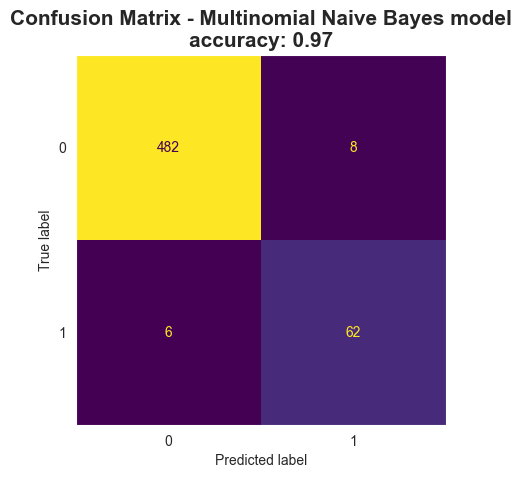

In [428]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_mnb), display_labels=mnb.classes_.astype(int))
disp.plot(values_format='d', colorbar=False)
plt.title(f"Confusion Matrix - Multinomial Naive Bayes model\naccuracy: {accuracy_mnb:.2f}", weight="bold", fontsize=15)
plt.grid(False)
plt.show()

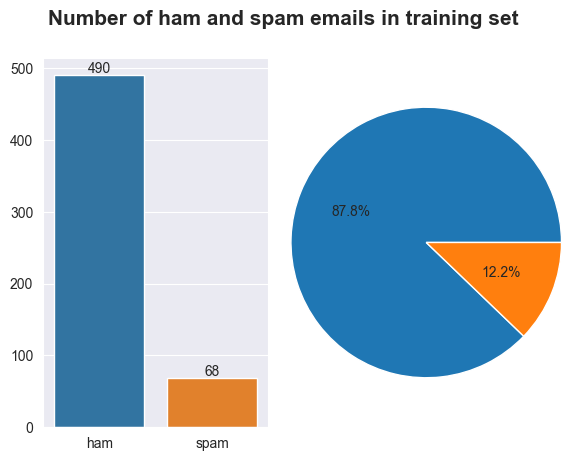

In [429]:
label_mapper = {0:"ham", 1:"spam"}
grouped = pd.DataFrame(y_test).value_counts()

fig, axes = plt.subplots(1, 2)

sns.barplot(ax=axes[0], x=[label_mapper[grouped.index[0][0]], label_mapper[grouped.index[1][0]]], y=grouped.values)
axes[0].bar_label(axes[0].containers[0])

axes[1].pie(grouped.values, autopct="%.1f%%", radius=1.5)
fig.suptitle("Number of ham and spam emails in training set", weight="bold", fontsize=15)
plt.show()

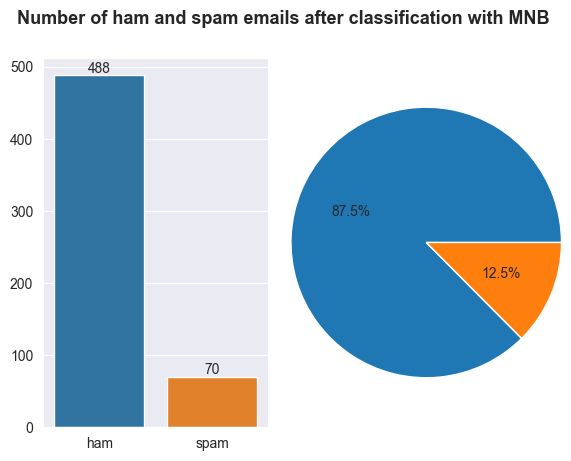

In [430]:
grouped = pd.DataFrame(y_pred_mnb).value_counts()

fig, axes = plt.subplots(1, 2)

sns.barplot(ax=axes[0], x=[label_mapper[grouped.index[0][0]], label_mapper[grouped.index[1][0]]], y=grouped.values)
axes[0].bar_label(axes[0].containers[0])

axes[1].pie(grouped.values, autopct="%.1f%%", radius=1.5)
fig.suptitle("Number of ham and spam emails after classification with MNB", weight="bold", fontsize=13)
plt.show()

In [431]:
print("False positives:")
fp = X_test[np.bitwise_and(y_test==0, y_pred_mnb==1)]
fp_indexes = [np.where((X==row).all(axis=1))[0][0] for row in fp]
fp_rows = df["v2"].iloc[fp_indexes]
for index, row in fp_rows.items():
    print(index, row)

False positives:
2418 Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
45 No calls..messages..missed calls
4539 Urgh, coach hot, smells of chip fat! Thanks again, especially for the duvet (not a predictive text word).
4598 Have you laid your airtel line to rest?
4364 Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
5081 \HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACKS �� FUCKINNICE!SELFISH
2569 Ultimately tor motive tui achieve korli.
1289 Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May


In [432]:
print("False negatives:")
fn= X_test[np.bitwise_and(y_test==1, y_pred_mnb==0)]
fn_indexes = [np.where((X==row).all(axis=1))[0][0] for row in fn]
fn_rows = df["v2"].iloc[fn_indexes]
for index, row in fn_rows.items():
    print(index, row)

False negatives:
4674 Hi babe its Chloe, how r u? I was smashed on saturday night, it was great! How was your weekend? U been missing me? SP visionsms.com Text stop to stop 150p/text
3528 Xmas & New Years Eve tickets are now on sale from the club, during the day from 10am till 8pm, and on Thurs, Fri & Sat night this week. They're selling fast!
3572 You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt
3417 LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
2773 How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?
5 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv


# Zadanie dodatkowe

In [433]:
spam_probabilities = {
    "xxx": .9,
    "bitcoin": .8
}

In [434]:
def decide_spam_ham(email, aprior_spam, apriori_ham, spam_probabilities):
    bag_of_words = email.split(' ')
    spam = aprior_spam
    ham = apriori_ham
    
    for word in bag_of_words:
        spam *= spam_probabilities[word] if word in list(spam_probabilities.keys()) else 1
        ham *= 1-spam_probabilities[word] if word in list(spam_probabilities.keys()) else 1
    
    print(f"Spam probability of your mail: {spam:.2f}\nHam probability of your mail: {ham:.2f}")

In [435]:
decide_spam_ham(email="give me bitcoin for xxx", aprior_spam=.5, apriori_ham=.5, spam_probabilities=spam_probabilities)

Spam probability of your mail: 0.36
Ham probability of your mail: 0.01


# Zadanie BONUS

In [436]:
poll_full = pd.read_csv("exitpoll.csv")
poll_full["partia"] = poll_full["partia"].factorize()[0]
poll_full

,wojewodztwo,miasto,szerokosc,dlugosc,partia
0,dolnoslaskie,Wrocław,51.11,17.04,0
1,kujawsko_pomorskie,Bydgoszcz,53.12,18.00,1
2,lubelskie,Lublin,51.25,22.57,1
3,lubuskie,Zielona Góra,51.94,15.51,0
4,lodzkie,Łódź,51.76,19.45,1
5,malopolskie,Kraków,50.06,19.94,1
6,mazowieckie,Warszawa,52.23,21.01,1
7,opolskie,Opole,50.68,17.92,0
8,podkarpackie,Rzeszów,50.04,21.99,1
9,podlaskie,Białystok,53.13,23.17,1


In [438]:
poll = poll_full.query("wojewodztwo not in ('dolnoslaskie', 'lubelskie', 'slaskie')")
poll

,wojewodztwo,miasto,szerokosc,dlugosc,partia
1,kujawsko_pomorskie,Bydgoszcz,53.12,18.00,1
3,lubuskie,Zielona Góra,51.94,15.51,0
4,lodzkie,Łódź,51.76,19.45,1
5,malopolskie,Kraków,50.06,19.94,1
6,mazowieckie,Warszawa,52.23,21.01,1
7,opolskie,Opole,50.68,17.92,0
8,podkarpackie,Rzeszów,50.04,21.99,1
9,podlaskie,Białystok,53.13,23.17,1
10,pomorskie,Gdańsk,54.35,18.65,0
12,swietokrzyskie,Kielce,50.87,20.63,1


In [439]:
new_records = poll_full.query("wojewodztwo in ('dolnoslaskie', 'lubelskie', 'slaskie')")

In [440]:
from sklearn.neighbors import KNeighborsClassifier

In [441]:
X = poll.iloc[:, 2:4]
y = poll["partia"]

new_records

,wojewodztwo,miasto,szerokosc,dlugosc,partia
0,dolnoslaskie,Wrocław,51.11,17.04,0
2,lubelskie,Lublin,51.25,22.57,1
11,slaskie,Katowice,50.26,19.02,0


In [446]:
knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X, y)

In [447]:
new_records["predicted"] = knn_3.predict(np.array(new_records.iloc[:, 2:4]))

new_records_predicted_pis = new_records[new_records["predicted"]==1]
new_records_predicted_po = new_records[new_records["predicted"]==0]

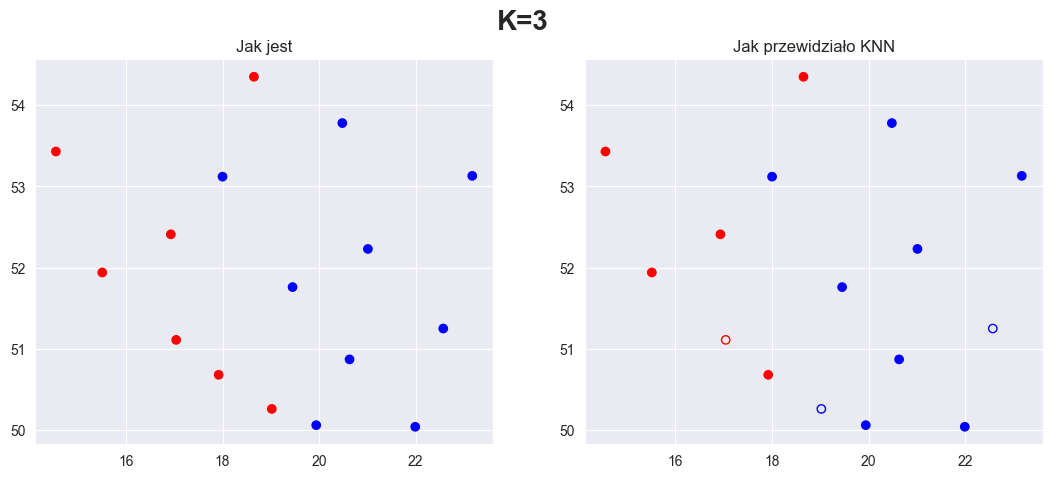

In [450]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].scatter(x=poll_full["dlugosc"], y=poll_full["szerokosc"], c=np.where(poll_full["partia"]==1, "blue", "red"))
axes[0].set_title("Jak jest")

axes[1].scatter(x=poll["dlugosc"], y=poll["szerokosc"], c=np.where(poll["partia"]==1, "blue", "red"))
axes[1].scatter(x=new_records_predicted_pis["dlugosc"], y=new_records_predicted_pis["szerokosc"], facecolors='none', edgecolors="blue")
axes[1].scatter(x=new_records_predicted_po["dlugosc"], y=new_records_predicted_po["szerokosc"], facecolors='none', edgecolors="red")
axes[1].set_title("Jak przewidziało KNN")

fig.suptitle("K=3", weight="bold", fontsize=20)
plt.show()

Dla `k=10` wychodzi tak samo, slask dostaje po dupie bo jest blizej pisiorów

Jak zmienimy na skrajne to będzie git bo wszyscy sąsiedzi będą jednomyślni.

Gdyby nie było Polski "A" i "B" takie przewidywanie pewnie miałoby sens, skoro zakładamy ze glosujemy jak sąsiedzi, w koncu to jest doslowna definicja KNN, ale wtedy polozenie na mapie nie mialoby wplywu na wynik, bo sasiedzi glosowaliby tak jakby losowo

W sumie nie wiem jakie dane pozwola na przewidywanie wynikow, warto zapytac

Pewnie by sie dalo, wygralby duda bo pis ma wiecej wojewodztw